In [2]:
!rm -rf Snudda
!git clone https://github.com/Hjorthmedh/Snudda.git

Cloning into 'Snudda'...
remote: Enumerating objects: 330, done.
remote: Counting objects: 100% (330/330), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 5038 (delta 168), reused 307 (delta 156), pack-reused 4708
Receiving objects: 100% (5038/5038), 217.60 MiB | 27.77 MiB/s, done.
Resolving deltas: 100% (3550/3550), done.
Checking out files: 100% (8090/8090), done.


This example creates a small toy example, you can increase the network size. For more information please see https://github.com/Hjorthmedh/Snudda/wiki/Developer-Installation-Guide

In [3]:
cd Snudda

/home/jovyan/Snudda


In [4]:
#!git reset --hard 96669669fb9ad0875b7bc36028ce0070254158c5

In [5]:
!pip3 install --upgrade .[dev]

Processing /home/jovyan/Snudda
Requirement already up-to-date: bluepyopt>=1.8.21 in /opt/conda/lib/python3.6/site-packages (from snudda==0.0.1b0)
Requirement already up-to-date: h5py>=2.8.0 in /opt/conda/lib/python3.6/site-packages (from snudda==0.0.1b0)
Requirement already up-to-date: ipyparallel>=6.2.3 in /opt/conda/lib/python3.6/site-packages (from snudda==0.0.1b0)
Requirement already up-to-date: matplotlib>=3.0.2 in /opt/conda/lib/python3.6/site-packages (from snudda==0.0.1b0)
Requirement already up-to-date: mpi4py>=3.0.1 in /opt/conda/lib/python3.6/site-packages (from snudda==0.0.1b0)
Requirement already up-to-date: numpy>=1.15.4 in /opt/conda/lib/python3.6/site-packages (from snudda==0.0.1b0)
Requirement already up-to-date: scipy>=1.2.0 in /opt/conda/lib/python3.6/site-packages (from snudda==0.0.1b0)
Requirement already up-to-date: sonata>=0.0.1 in /opt/conda/lib/python3.6/site-packages (from snudda==0.0.1b0)
Requirement already up-to-date: pyzmq>=18.0.0 in /opt/conda/lib/python3

Requirement already up-to-date: wcwidth in /opt/conda/lib/python3.6/site-packages (from prompt-toolkit!=3.0.0,!=3.0.1,<3.1.0,>=2.0.0->ipython>=4->ipyparallel>=6.2.3->snudda==0.0.1b0)
Requirement already up-to-date: ptyprocess>=0.5 in /opt/conda/lib/python3.6/site-packages (from pexpect; sys_platform != "win32"->ipython>=4->ipyparallel>=6.2.3->snudda==0.0.1b0)
Requirement already up-to-date: zipp>=0.5 in /opt/conda/lib/python3.6/site-packages (from importlib-metadata; python_version < "3.8"->jsonschema->sonata>=0.0.1->snudda==0.0.1b0)
  Found existing installation: snudda 0.0.1b0
    Uninstalling snudda-0.0.1b0:
      Successfully uninstalled snudda-0.0.1b0
  Running setup.py install for snudda ... done
You are using pip version 9.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
!snudda init networks/tinySim --size 100 --overwrite 

Creating config file
Network path: networks/tinySim
Creating missing directory networks/tinySim
CreateConfig
Using 1 functional channels
Adding Striatum with 100 neurons
Using cube for striatum
Creating cube mesh
File: networks/tinySim/mesh/Striatum-cube-mesh-0.00010749824478388102.obj
Centre: [0.00354  0.004645 0.005081]
Side: 0.00010749824478388102
Description: Striatum cube mesh, centre = [0.00354  0.004645 0.005081], side = 0.00010749824478388102
Adding neurons: FSN from dir /home/jovyan/Snudda/snudda/data/cellspecs/fs
Adding neurons: dSPN from dir /home/jovyan/Snudda/snudda/data/cellspecs/dspn
Adding neurons: iSPN from dir /home/jovyan/Snudda/snudda/data/cellspecs/ispn
Adding neurons: ChIN from dir /home/jovyan/Snudda/snudda/data/cellspecs/chin
Checking boundaries, to make sure P is not too high
LTS axon density P([-0.0002],[-0.0001],[-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002],[-0.0001],[3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002],[0.0001],[-3.e-05]) = 

In [7]:
!snudda place networks/tinySim

Placing neurons
Network path: networks/tinySim
Creating missing directory networks/tinySim/log
Using runID = 1
Using hdf5 version: latest
Parsing configuration file networks/tinySim/network-config.json
Using meshBinWidth 0.00010749824478388102
Cube mesh, switching to serial processing.
No mesh cache file found (networks/tinySim/mesh/Striatum-cube-mesh-0.00010749824478388102.obj-107-cache.pickle)
Running in serial
Voxel mask: 5x5x5
Processing x = 0
Processing x = 1
Processing x = 2
Processing x = 3
Processing x = 4
Fraction of border voxels: 0.0
Saving mesh cache file networks/tinySim/mesh/Striatum-cube-mesh-0.00010749824478388102.obj-107-cache.pickle
Calculation time: 0.016959761269390583 s
Setup voxel list
Setup place neurons
Update padding mask
Regenerating new random pool
Setup done
Inner voxel bin volume: 0.0 mm³
Using dimensions from config file
Adding: 1 FSN_1
No cache file found.
Saving cache file: /home/jovyan/Snudda/snudda/data/cellspecs/fs/str-fs-e160628_FS2-mMTC180800A-IDB-v

In [8]:
!snudda detect networks/tinySim

Touch detection
Network path: networks/tinySim
Creating missing directory networks/tinySim/voxels
Using runID = 2
Already have a log file setup, ignoring
Using hdf5 driver version: latest
{'total': 65975836, 'free': 62894000, 'used': 3081836}
Each hyper voxel has 100 x 100 x 100 voxels
Touch detecting all volumes
Loading from networks/tinySim/network-config.json
Reading prototype for: FSN_1
Found cache file: /home/jovyan/Snudda/snudda/data/cellspecs/fs/str-fs-e160628_FS2-mMTC180800A-IDB-v20190226/MTC180800A-IDB-cor-rep-cache.pickle
Reading prototype for: dSPN_0
Found cache file: /home/jovyan/Snudda/snudda/data/cellspecs/dspn/str-dspn-e150917_c6_D1-m21-6-DE-v20190503/21-6-DE-cor-rep-ax-cache.pickle
Reading prototype for: dSPN_1
Found cache file: /home/jovyan/Snudda/snudda/data/cellspecs/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20190508/WT-0728MSN01-cor-rep-ax-cache.pickle
Reading prototype for: dSPN_2
Found cache file: /home/jovyan/Snudda/snudda/data/cellspecs/dspn/str-dspn-e150917_c1

Processing hyper voxel : 4/64 (65 neurons)
Placing 40727 random axon points for ChIN_0(cached)
nPoints = 40727
placeSynapsesNoAxonSphere: 0.05858047865331173s, hyperID: 4
Create lookup table
detectSynapses: 401 took 0.03365013934671879s
Create lookup table
detectGapJunctions: 0.02469319198280573s
Wrote hyper voxel 4 (401 synapses, 0 gap junctions)
HyperID 4 completed - 401 synapses and 0 gap junctions found (27.98713971208781s)
Processing hyper voxel : 0/64 (45 neurons)
Placing 40727 random axon points for ChIN_0(cached)
nPoints = 40727
placeSynapsesNoAxonSphere: 0.0533983800560236s, hyperID: 0
Create lookup table
detectSynapses: 58 took 0.012603368610143661s
Create lookup table
detectGapJunctions: 0.00943530723452568s
Wrote hyper voxel 0 (58 synapses, 0 gap junctions)
HyperID 0 completed - 58 synapses and 0 gap junctions found (17.16369199194014s)
Processing hyper voxel : 22/64 (43 neurons)
Placing 40727 random axon points for ChIN_0(cached)
nPoints = 40727
placeSynapsesNoAxonSphere: 

In [9]:
!snudda prune networks/tinySim

Prune synapses
Network path: networks/tinySim
Using runID = 3
preMergeOnly : False
Setting random seed: None
Using hdf5 driver sec2, latest version
Opening work history file: networks/tinySim/log/network-detect-worklog.hdf5
/home/jovyan/Snudda/snudda/prune.py:352: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.SlurmID = self.histFile["meta/SlurmID"].value
/home/jovyan/Snudda/snudda/prune.py:353: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.hyperVoxelIDs = self.histFile["meta/hyperVoxelIDs"].value
/home/jovyan/Snudda/snudda/prune.py:354: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.allHyperIDs = self.histFile["allHyperIDs"].value
/home/jovyan/Snudda/snudda/prune.py:355: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.voxelSize = self.histFile["meta/voxelSize"].value
/home/jovyan/Snudda/snudda/prune.py:356: H5py

Saving morphology in HDF5 file: /home/jovyan/Snudda/snudda/data/cellspecs/ispn/str-ispn-e160118_c10_D2-m46-3-DE-v20190529/46-3-DE-cor-rep-ax.swc
Saving morphology in HDF5 file: /home/jovyan/Snudda/snudda/data/cellspecs/ispn/str-ispn-e151123_c1_D2-mWT-P270-09-v20190527/WT-P270-09-15ak-cor.swc
Saving morphology in HDF5 file: /home/jovyan/Snudda/snudda/data/cellspecs/chin/str-chin-e170614_cell6-m17JUL301751_170614_no6_MD_cell_1_x63-v20190710/17JUL301751_170614_no6_MD_cell_1_x63-cor-noaxon.swc
Saving morphology in HDF5 file: /home/jovyan/Snudda/snudda/data/cellspecs/lts/LTS_Experiment-9862_20181211/lts_morp_2019-11-07_centered_noAxon.swc
Pruning range : (0, 128343)
Number of synapses removed where synapse connection not allowed: 0
Number of synapses removed due to distance dependent pruning: 31766
Number of synapses removed randomly: 80096
Number of synapses removed due to too many synapses between connected pair: 977
Number of synapses removed due to too few synapses between connected pai

In [10]:
!snudda input networks/tinySim --input snudda/data/config/input-tinytest-v6.json --time 1.0

Setting up inputs, assuming input.json exists
Using runID = 4
Writing input spikes to networks/tinySim/input-spikes.hdf5
Time = 1.0
Setting random seed: None
Using hdf5 version latest
Loading HDF5-file: networks/tinySim/network-pruned-synapses.hdf5
/home/jovyan/Snudda/snudda/input.py:1071: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.networkConfigFile = f["meta"]["configFile"].value
/home/jovyan/Snudda/snudda/input.py:1072: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.positionFile = f["meta"]["positionFile"].value
/home/jovyan/Snudda/snudda/input.py:1073: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.networkSlurmID = int(f["meta/SlurmID"].value)
/home/jovyan/Snudda/snudda/input.py:1075: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.axonStumpIDFlag = f["meta/axonStumpIDFlag"].value
Loading input configuratio

Gathering 25 - CorticalSignal
Generating 114 inputs for dSPN_2
Gathering 25 - Thalamic
Generating 166 inputs for iSPN_3
Gathering 26 - CorticalBase
Generating 154 inputs for iSPN_3
Gathering 26 - CorticalSignal
Generating 100 inputs for iSPN_3
Gathering 26 - Thalamic
Generating 237 inputs for dSPN_3
Gathering 27 - CorticalBase
Generating 226 inputs for dSPN_3
Gathering 27 - CorticalSignal
Generating 146 inputs for dSPN_3
Gathering 27 - Thalamic
Generating 182 inputs for dSPN_1
Gathering 28 - CorticalBase
Generating 164 inputs for dSPN_1
Gathering 28 - CorticalSignal
Generating 121 inputs for dSPN_1
Gathering 28 - Thalamic
Generating 164 inputs for dSPN_0
Gathering 29 - CorticalBase
Generating 163 inputs for dSPN_0
Gathering 29 - CorticalSignal
Generating 107 inputs for dSPN_0
Gathering 29 - Thalamic
Found cache file: /home/jovyan/Snudda/snudda/data/cellspecs/ispn/str-ispn-e150908_c4_D2-m51-5-DE-v20190611/51-5-DE-cor-rep-ax-cache.pickle
Generating 132 inputs for iSPN_1
Gathering 30 - Co

Gathering 69 - CorticalBase
Generating 217 inputs for iSPN_0
Gathering 69 - CorticalSignal
Generating 134 inputs for iSPN_0
Gathering 69 - Thalamic
Generating 182 inputs for iSPN_3
Gathering 70 - CorticalBase
Generating 161 inputs for iSPN_3
Gathering 70 - CorticalSignal
Generating 93 inputs for iSPN_3
Gathering 70 - Thalamic
Generating 197 inputs for dSPN_2
Gathering 71 - CorticalBase
Generating 187 inputs for dSPN_2
Gathering 71 - CorticalSignal
Generating 90 inputs for dSPN_2
Gathering 71 - Thalamic
Generating 214 inputs for iSPN_0
Gathering 72 - CorticalBase
Generating 187 inputs for iSPN_0
Gathering 72 - CorticalSignal
Generating 133 inputs for iSPN_0
Gathering 72 - Thalamic
Generating 173 inputs for iSPN_3
Gathering 73 - CorticalBase
Generating 181 inputs for iSPN_3
Gathering 73 - CorticalSignal
Generating 98 inputs for iSPN_3
Gathering 73 - Thalamic
Generating 105 inputs for iSPN_2
Gathering 74 - CorticalBase
Generating 100 inputs for iSPN_2
Gathering 74 - CorticalSignal
Generat

In [11]:
!nrnivmodl snudda/data/cellspecs/mechanisms
!rm -f mechanisms

Creating x86_64 directory for .o files.

/home/jovyan/Snudda
ls: cannot access 'snudda/data/cellspecs/mechanisms/*.inc': No such file or directory
snudda/data/cellspecs/mechanisms/bk_ch.mod snudda/data/cellspecs/mechanisms/bk_fs.mod snudda/data/cellspecs/mechanisms/bk_ms.mod snudda/data/cellspecs/mechanisms/ca_ch.mod snudda/data/cellspecs/mechanisms/cadyn_fs.mod snudda/data/cellspecs/mechanisms/cadyn_ms.mod snudda/data/cellspecs/mechanisms/cal12_ms.mod snudda/data/cellspecs/mechanisms/cal13_ms.mod snudda/data/cellspecs/mechanisms/cal_ch.mod snudda/data/cellspecs/mechanisms/caldyn_ms.mod snudda/data/cellspecs/mechanisms/can_fs.mod snudda/data/cellspecs/mechanisms/can_ms.mod snudda/data/cellspecs/mechanisms/cap_ch.mod snudda/data/cellspecs/mechanisms/caq_fs.mod snudda/data/cellspecs/mechanisms/caq_ms.mod snudda/data/cellspecs/mechanisms/car_fs.mod snudda/data/cellspecs/mechanisms/car_ms.mod snudda/data/cellspecs/mechanisms/cat32_ms.mod snudda/data/cellspecs/mechanisms/cat33_ms.mod snudda

"/home/jovyan/.local/nrn-7.6/x86_64/bin/nocmodl" caldyn_ms
Translating caldyn_ms.mod into caldyn_ms.c
Thread Safe
"/home/jovyan/.local/nrn-7.6/share/nrn/libtool" --tag=CC --mode=compile gcc -DHAVE_CONFIG_H  -I. -I.. -I"/home/jovyan/.local/nrn-7.6/include/nrn" -I"/home/jovyan/.local/nrn-7.6/x86_64/lib"      -g -O2 -c -o caldyn_ms.lo caldyn_ms.c
libtool: compile:  gcc -DHAVE_CONFIG_H -I. -I.. -I/home/jovyan/.local/nrn-7.6/include/nrn -I/home/jovyan/.local/nrn-7.6/x86_64/lib -g -O2 -c caldyn_ms.c  -fPIC -DPIC -o .libs/caldyn_ms.o
"/home/jovyan/.local/nrn-7.6/x86_64/bin/nocmodl" can_fs
Translating can_fs.mod into can_fs.c
Thread Safe
"/home/jovyan/.local/nrn-7.6/share/nrn/libtool" --tag=CC --mode=compile gcc -DHAVE_CONFIG_H  -I. -I.. -I"/home/jovyan/.local/nrn-7.6/include/nrn" -I"/home/jovyan/.local/nrn-7.6/x86_64/lib"      -g -O2 -c -o can_fs.lo can_fs.c
libtool: compile:  gcc -DHAVE_CONFIG_H -I. -I.. -I/home/jovyan/.local/nrn-7.6/include/nrn -I/home/jovyan/.local/nrn-7.6/x86_64/lib -g -O

libtool: compile:  gcc -DHAVE_CONFIG_H -I. -I.. -I/home/jovyan/.local/nrn-7.6/include/nrn -I/home/jovyan/.local/nrn-7.6/x86_64/lib -g -O2 -c kaf_fs.c  -fPIC -DPIC -o .libs/kaf_fs.o
"/home/jovyan/.local/nrn-7.6/x86_64/bin/nocmodl" kaf_ms
Translating kaf_ms.mod into kaf_ms.c
Thread Safe
"/home/jovyan/.local/nrn-7.6/share/nrn/libtool" --tag=CC --mode=compile gcc -DHAVE_CONFIG_H  -I. -I.. -I"/home/jovyan/.local/nrn-7.6/include/nrn" -I"/home/jovyan/.local/nrn-7.6/x86_64/lib"      -g -O2 -c -o kaf_ms.lo kaf_ms.c
libtool: compile:  gcc -DHAVE_CONFIG_H -I. -I.. -I/home/jovyan/.local/nrn-7.6/include/nrn -I/home/jovyan/.local/nrn-7.6/x86_64/lib -g -O2 -c kaf_ms.c  -fPIC -DPIC -o .libs/kaf_ms.o
"/home/jovyan/.local/nrn-7.6/x86_64/bin/nocmodl" kas_fs
Translating kas_fs.mod into kas_fs.c
Thread Safe
"/home/jovyan/.local/nrn-7.6/share/nrn/libtool" --tag=CC --mode=compile gcc -DHAVE_CONFIG_H  -I. -I.. -I"/home/jovyan/.local/nrn-7.6/include/nrn" -I"/home/jovyan/.local/nrn-7.6/x86_64/lib"      -g -O2 -

libtool: compile:  gcc -DHAVE_CONFIG_H -I. -I.. -I/home/jovyan/.local/nrn-7.6/include/nrn -I/home/jovyan/.local/nrn-7.6/x86_64/lib -g -O2 -c na3n_lts.c  -fPIC -DPIC -o .libs/na3n_lts.o
"/home/jovyan/.local/nrn-7.6/x86_64/bin/nocmodl" na_ch
Translating na_ch.mod into na_ch.c
NEURON's CVode method ignores conservation
Thread Safe
"/home/jovyan/.local/nrn-7.6/share/nrn/libtool" --tag=CC --mode=compile gcc -DHAVE_CONFIG_H  -I. -I.. -I"/home/jovyan/.local/nrn-7.6/include/nrn" -I"/home/jovyan/.local/nrn-7.6/x86_64/lib"      -g -O2 -c -o na_ch.lo na_ch.c
libtool: compile:  gcc -DHAVE_CONFIG_H -I. -I.. -I/home/jovyan/.local/nrn-7.6/include/nrn -I/home/jovyan/.local/nrn-7.6/x86_64/lib -g -O2 -c na_ch.c  -fPIC -DPIC -o .libs/na_ch.o
"/home/jovyan/.local/nrn-7.6/x86_64/bin/nocmodl" naf_fs
Translating naf_fs.mod into naf_fs.c
Thread Safe
"/home/jovyan/.local/nrn-7.6/share/nrn/libtool" --tag=CC --mode=compile gcc -DHAVE_CONFIG_H  -I. -I.. -I"/home/jovyan/.local/nrn-7.6/include/nrn" -I"/home/jovyan/

libtool: link: (cd ".libs" && rm -f "libnrnmech.so.0" && ln -s "libnrnmech.so.0.0.0" "libnrnmech.so.0")
libtool: link: (cd ".libs" && rm -f "libnrnmech.so" && ln -s "libnrnmech.so.0.0.0" "libnrnmech.so")
libtool: link: ( cd ".libs" && rm -f "libnrnmech.la" && ln -s "../libnrnmech.la" "libnrnmech.la" )
Successfully created x86_64/special


In [12]:
# This generates the plots from the analysis for the connectivity
# !python3 snudda/analyse_striatum.py networks/tinySim

In [13]:
!snudda simulate networks/tinySim/ --time 0.1 --input networks/tinySim/input-spikes.hdf5 --voltOut networks/tinySim/simulation/volt.txt

Creating missing directory networks/tinySim/simulation
Using input file networks/tinySim/input-spikes.hdf5
args: Namespace(action='simulate', cont=False, disableGJ=False, h5legacy=False, hvsize=None, input='networks/tinySim/input-spikes.hdf5', inputFile=None, mechDir=None, mergeonly=False, nchannels=1, networkFile=None, overwrite=False, path='networks/tinySim', profile=False, size=None, spikesOut=None, time=0.1, verbose=False, voltOut='networks/tinySim/simulation/volt.txt', volumeID=None)
Using networkFile: networks/tinySim/network-pruned-synapses.hdf5
Using inputFile: networks/tinySim/input-spikes.hdf5
Using logFile: networks/tinySim/log/network-simulation-log.txt
Creating save/traces
Worker 0: Loading network from networks/tinySim/network-pruned-synapses.hdf5
Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5
/home/jovyan/Snudda/snudda/load.py:53: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data["config"] = f[

Neuron iSPN_0 resting voltage = -86
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 32 dSPN_0
Neuron dSPN_0 resting voltage = -86
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 33 dSPN_1
Neuron dSPN_1 resting voltage = -86
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 34 iSPN_3
Neuron iSPN_3 resting voltage = -83
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 35 dSPN_0
Neuron dSPN_0 resting voltage = -86
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 36 iSPN_0
Neuron iSPN_0 resting voltage = -86
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 37 iSPN_0
Neuron iSPN_0 resting voltage = -86
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 38 dSPN_1
Neuron dSPN_1 resting voltage = -86
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 39 iSPN_2
Neuron iSPN_2 resting voltage = -83
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 40 dSPN_0
N

0: Memory status: 94% free
Adding somatic recordings
0: Memory status: 94% free
Running simulation for 100.0 ms.
Running simulation for 0.1 s
1% done. Elapsed: 6.7 s, estimated time left: 666.1 s
2% done. Elapsed: 12.3 s, estimated time left: 604.3 s
3% done. Elapsed: 18.0 s, estimated time left: 581.0 s
4% done. Elapsed: 23.6 s, estimated time left: 566.7 s
5% done. Elapsed: 29.2 s, estimated time left: 554.2 s
6% done. Elapsed: 35.2 s, estimated time left: 552.0 s
7% done. Elapsed: 41.2 s, estimated time left: 548.0 s
8% done. Elapsed: 47.0 s, estimated time left: 541.1 s
9% done. Elapsed: 52.4 s, estimated time left: 529.9 s
10% done. Elapsed: 57.9 s, estimated time left: 521.1 s
11% done. Elapsed: 64.6 s, estimated time left: 522.4 s
12% done. Elapsed: 70.6 s, estimated time left: 517.6 s
13% done. Elapsed: 76.8 s, estimated time left: 514.0 s
14% done. Elapsed: 82.6 s, estimated time left: 507.6 s
15% done. Elapsed: 88.3 s, estimated time left: 500.4 s
16% done. Elapsed: 94.5 s, e

In [14]:
%matplotlib inline

In [15]:
# This generates the spike raster in command line
#!python3 snudda/plotting/Network_plot_spike_raster.py networks/tinySim/output-spikes.txt networks/tinySim/network-pruned-synapses.hdf5
#!python3 snudda/plotting/Network_plot_spike_raster.py networks/tinySim/simulation/network-output-spikes-666.txt networks/tinySim/network-pruned-synapses.hdf5

In [16]:
# This generates volt traces in command line
# !python3 snudda/plotting/Network_plot_traces.py networks/tinySim/simulation/volt.txt networks/tinySim/network-pruned-synapses.hdf5

Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5
99 neurons with 7066 synapses and 10000 gap junctions
Load done. 0.14539649803191423
Sort the traces
Sort the traces


/home/jovyan/Snudda/snudda/load.py:53: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data["config"] = f["config"].value
/home/jovyan/Snudda/snudda/load.py:54: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.config = json.loads(f["config"].value)
/home/jovyan/Snudda/snudda/load.py:81: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  * f["meta/voxelSize"].value \
/home/jovyan/Snudda/snudda/load.py:82: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  + f["meta/simulationOrigo"].value
/home/jovyan/Snudda/snudda/load.py:103: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  configFile = f["meta/configFile"].value
/home/jovyan/Snudda/snudda/load.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  positionFile = f["meta/positionFile"].value
/home/jovyan/Snudda/s

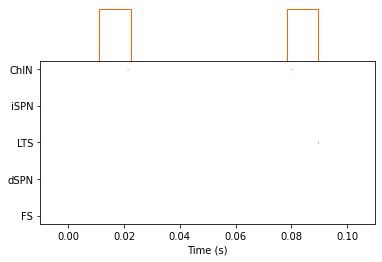

<Figure size 432x288 with 0 Axes>

Saving networks/tinySim/figs/network-output-spikes-666-colour.png


<Figure size 432x288 with 0 Axes>

In [17]:
# This generates spike raster, plot visible in the jupyter notebook
from snudda.plotting.Network_plot_spike_raster import NetworkPlotSpikeRaster

fileName = "networks/tinySim/simulation/network-output-spikes-666.txt"
networkFile = "networks/tinySim/network-pruned-synapses.hdf5"
endTime = 0.1
npsr = NetworkPlotSpikeRaster(fileName,networkFile,skipTime=0.0,
                                  endTime=endTime,
                                  typeOrder=["FSN","dSPN","LTS","iSPN","ChIN"])

Unable to guess ID, using 666.
Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5
99 neurons with 7066 synapses and 10000 gap junctions
Load done. 0.09330322500318289
!!! Excluding first 0s from the plot
Plotting traces: [0, 1, 5, 7, 9]
Plotted 5 traces (total 99)


/home/jovyan/Snudda/snudda/load.py:53: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data["config"] = f["config"].value
/home/jovyan/Snudda/snudda/load.py:54: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.config = json.loads(f["config"].value)
/home/jovyan/Snudda/snudda/load.py:81: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  * f["meta/voxelSize"].value \
/home/jovyan/Snudda/snudda/load.py:82: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  + f["meta/simulationOrigo"].value
/home/jovyan/Snudda/snudda/load.py:103: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  configFile = f["meta/configFile"].value
/home/jovyan/Snudda/snudda/load.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  positionFile = f["meta/positionFile"].value
/home/jovyan/Snudda/s

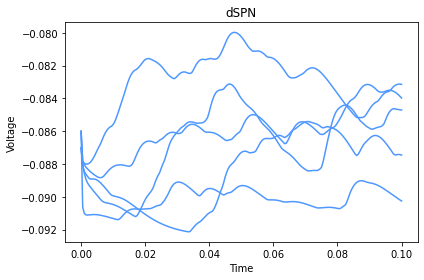

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-dSPN-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [2, 3, 4, 6, 8]
Plotted 5 traces (total 99)


<Figure size 432x288 with 0 Axes>

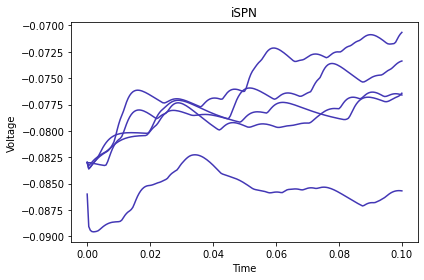

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-iSPN-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [82]
Plotted 1 traces (total 99)


<Figure size 432x288 with 0 Axes>

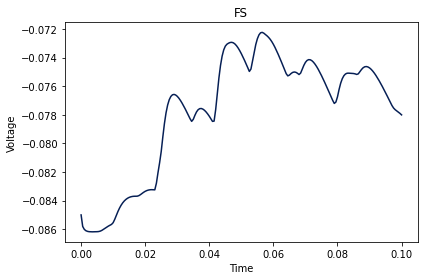

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-FSN-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [63]
Plotted 1 traces (total 99)


<Figure size 432x288 with 0 Axes>

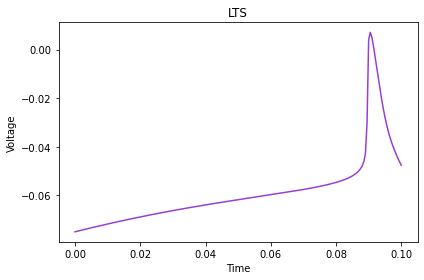

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-LTS-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [44]
Plotted 1 traces (total 99)


<Figure size 432x288 with 0 Axes>

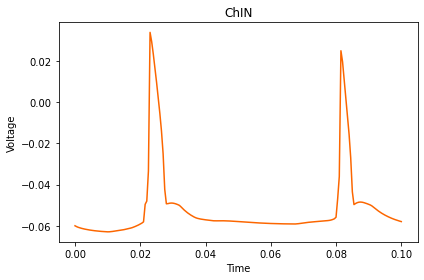

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-ChIN-colour.png


<Figure size 432x288 with 0 Axes>

In [18]:
# This generates the voltage trace, plot visible in jupyter notebook
from snudda.plotting.Network_plot_traces import NetworkPlotTraces

fileName = "networks/tinySim/simulation/volt.txt"
npt = NetworkPlotTraces(fileName,networkFile)
networkFile = "networks/tinySim/network-pruned-synapses.hdf5"

plotOffset = 0 # -0.2
skipTime = 0 #0.5
nTracesMax = 5
    
npt.plotTraceNeuronType(neuronType="dSPN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="iSPN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="FSN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="LTS",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="ChIN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)


Loading networks/tinySim/network-pruned-synapses.hdf5
Assuming volume type: cube[cube or full]
Only using 20000neurons of the connection data
Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5
99 neurons with 7066 synapses and 10000 gap junctions
Load done. 0.04993605148047209
Number of neurons: 99
Synapse row 0 - 0.0 % time: 0.0027142828330397606 seconds
Created connection matrix 0.02146056480705738 seconds
GJ row : 0 - 0.0 %  time : 0.001165345311164856 seconds
Created gap junction connection matrix 0.059542867355048656 seconds
Creating population dictionary
Done.
!!! Setting sideLen to None
Calculating synapse distance histogram
Creating dist histogram
nSynapses = 7066, at 0
Created distance histogram (optimised) in 0.025870230980217457 seconds
Saving cache to networks/tinySim/network-pruned-synapses.hdf5-cache
Plotting connection probability dSPN to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections


/home/jovyan/Snudda/snudda/load.py:53: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data["config"] = f["config"].value
/home/jovyan/Snudda/snudda/load.py:54: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.config = json.loads(f["config"].value)
/home/jovyan/Snudda/snudda/load.py:103: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  configFile = f["meta/configFile"].value
/home/jovyan/Snudda/snudda/load.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  positionFile = f["meta/positionFile"].value
/home/jovyan/Snudda/snudda/load.py:117: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if(type(f["meta/SlurmID"].value) == bytes):
/home/jovyan/Snudda/snudda/load.py:120: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data["SlurmID"] = int(f["meta/SlurmID"]

Requested: 10000000.0 calculated [2042.]
Rejected (too large z-depth): 262
P(d<5e-05)=0.0611541774332472
P(d<0.0001)=0.06416584402764067


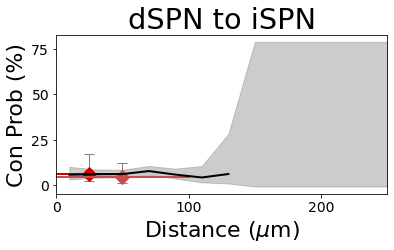

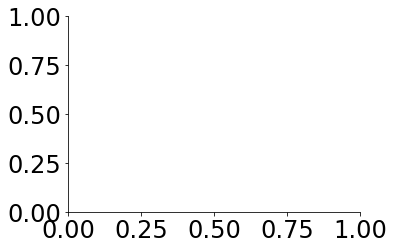

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-dSPN-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability dSPN to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections


/home/jovyan/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


Requested: 10000000.0 calculated [2040.]
Rejected (too large z-depth): 216
P(d<5e-05)=0.2589928057553957
P(d<0.0001)=0.23326771653543307


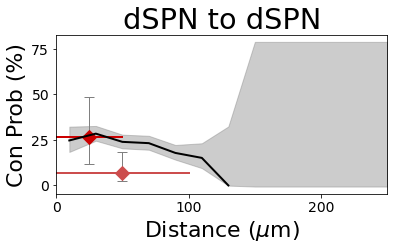

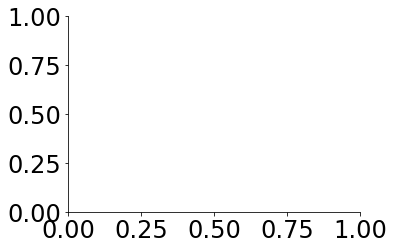

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-dSPN-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability iSPN to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections


/home/jovyan/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


Requested: 10000000.0 calculated [2042.]
Rejected (too large z-depth): 262
P(d<5e-05)=0.29371231696813094
P(d<0.0001)=0.2650542941757157


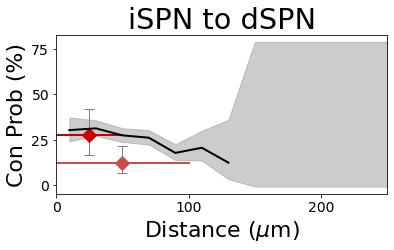

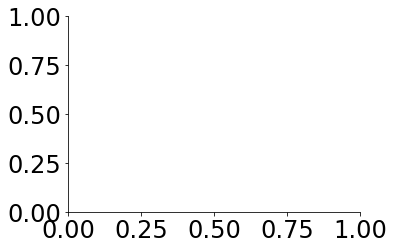

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-iSPN-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability iSPN to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections


/home/jovyan/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


Requested: 10000000.0 calculated [1940.]
Rejected (too large z-depth): 316
P(d<5e-05)=0.3430034129692833
P(d<0.0001)=0.333852544132918


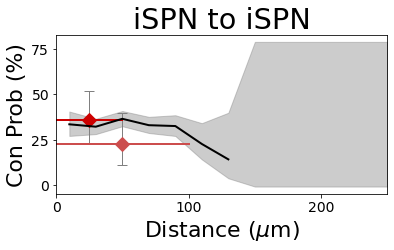

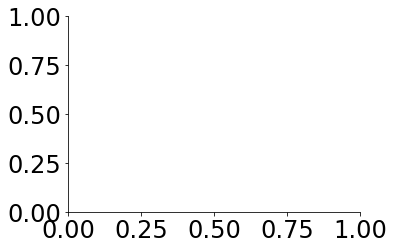

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-iSPN-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability FSN to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [34.]
Rejected (too large z-depth): 14
P(d<0.0001)=0.5454545454545454
P(d<0.00015)=0.5294117647058824
P(d<0.00025)=0.5294117647058824


/home/jovyan/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


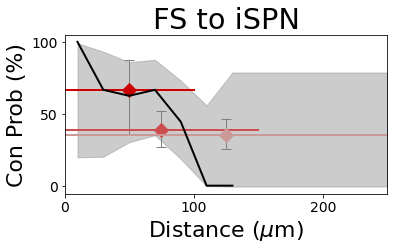

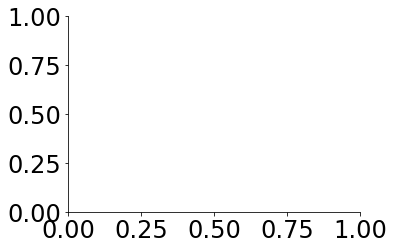

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability FSN to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [35.]
Rejected (too large z-depth): 13
P(d<0.0001)=0.8285714285714286
P(d<0.00015)=0.8285714285714286
P(d<0.00025)=0.8285714285714286


/home/jovyan/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


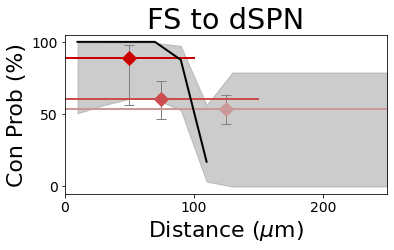

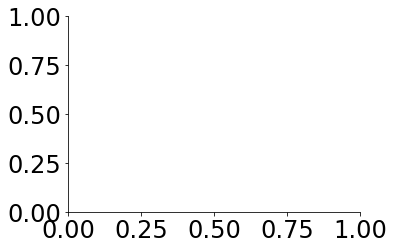

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability FSN to FSN (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [0.]
Rejected (too large z-depth): 0
P(d<0.00025)=0.0


/home/jovyan/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


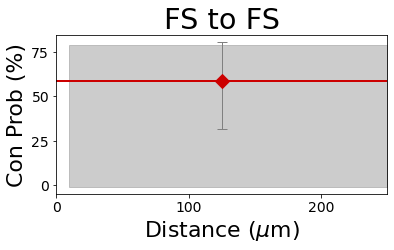

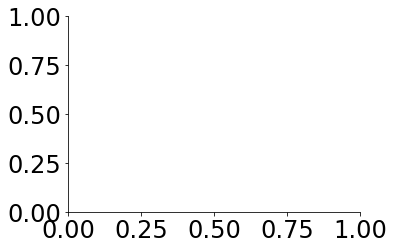

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-FSN-synapses-2D-dist.pdf
Plotting connection probability FSN to FSN (gapjunctions)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [0.]
Rejected (too large z-depth): 0
P(d<0.00025)=0.0
P(d<0.00025)=0.0


/home/jovyan/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


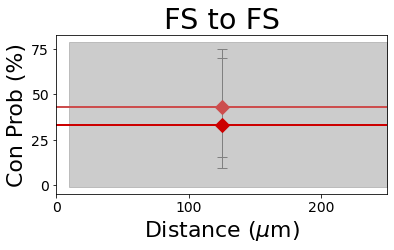

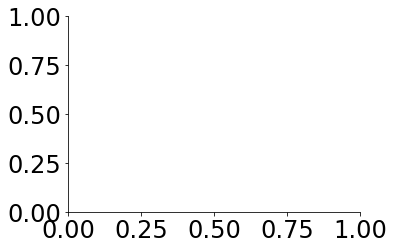

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-FSN-gapjunctions-2D-dist.pdf
Plotting connection probability LTS to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [48.]
Rejected (too large z-depth): 0
P(d<0.00025)=0.0625


/home/jovyan/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


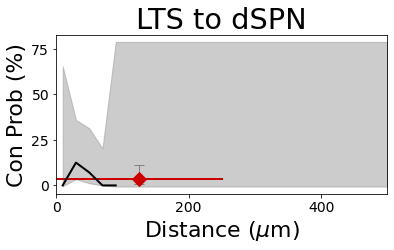

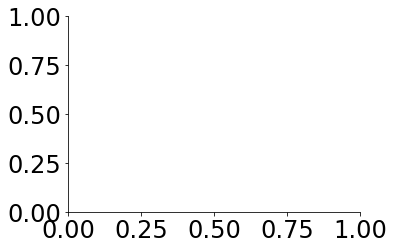

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-LTS-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability LTS to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [48.]
Rejected (too large z-depth): 0
P(d<0.00025)=0.08333333333333333


/home/jovyan/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


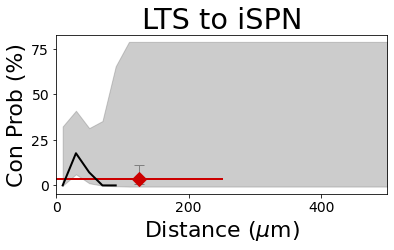

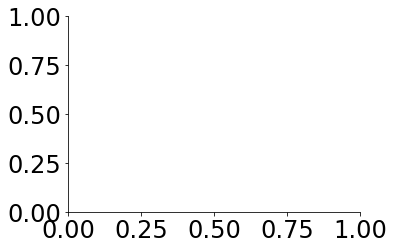

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-LTS-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability FSN to LTS (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [1.]
Rejected (too large z-depth): 0
P(d<0.00025)=0.0


/home/jovyan/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


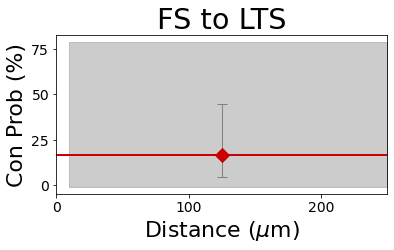

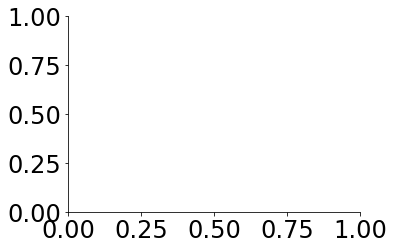

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-LTS-synapses-2D-dist.pdf
Plotting connection probability ChIN to LTS (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [1.]
Rejected (too large z-depth): 0


/home/jovyan/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


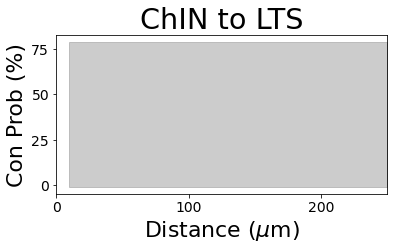

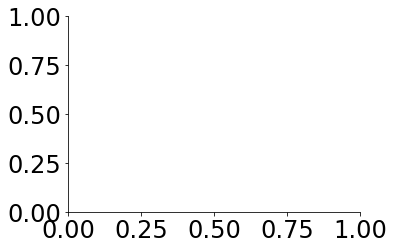

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-LTS-synapses-2D-dist.pdf
Plotting connection probability ChIN to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [48.]
Rejected (too large z-depth): 0
P(d<0.00025)=0.0


/home/jovyan/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


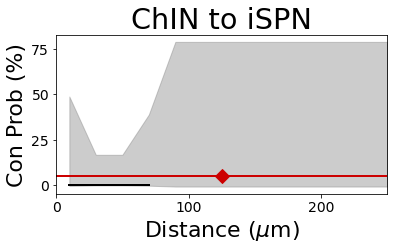

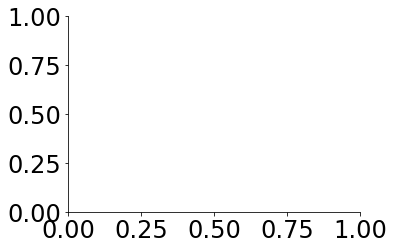

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability ChIN to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [48.]
Rejected (too large z-depth): 0
P(d<0.00025)=0.0


/home/jovyan/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


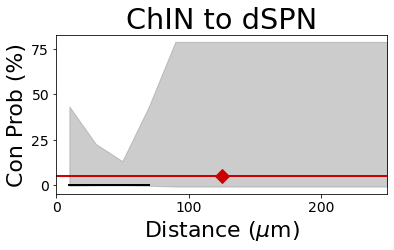

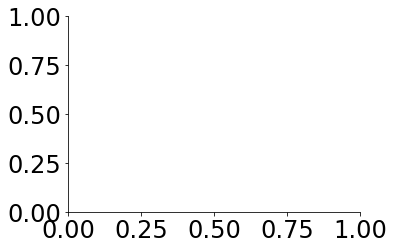

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability LTS to ChIN (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [1.]
Rejected (too large z-depth): 0


/home/jovyan/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


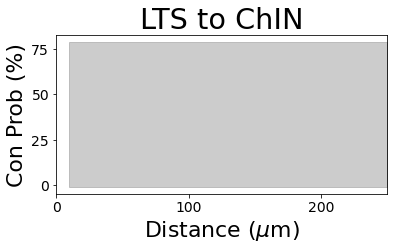

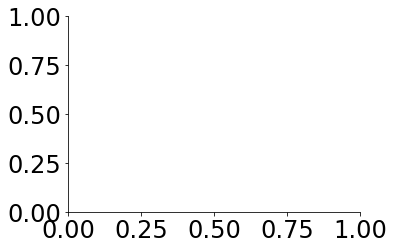

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-LTS-to-ChIN-synapses-2D-dist.pdf
Plotting connection probability ChIN to FSN (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [1.]
Rejected (too large z-depth): 0


/home/jovyan/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


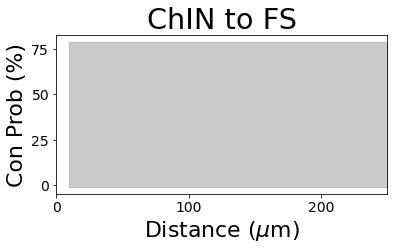

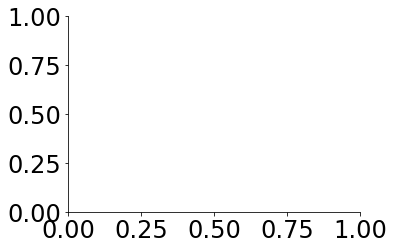

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-FSN-synapses-2D-dist.pdf
Plotting connection probability dSPN to ChIN (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [48.]
Rejected (too large z-depth): 0


/home/jovyan/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


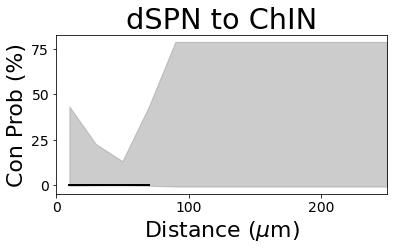

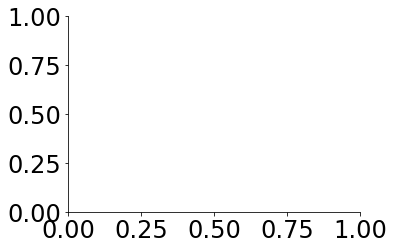

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-dSPN-to-ChIN-synapses-2D-dist.pdf
Plotting connection probability iSPN to ChIN (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [48.]
Rejected (too large z-depth): 0


/home/jovyan/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


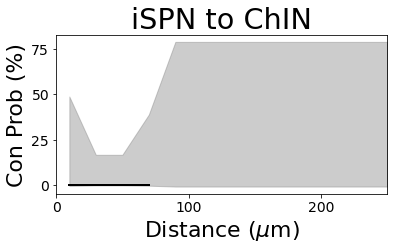

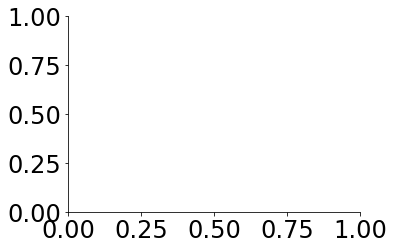

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-iSPN-to-ChIN-synapses-2D-dist.pdf


In [19]:
  from snudda.analyse_striatum import SnuddaAnalyseStriatum
  nas = SnuddaAnalyseStriatum("networks/tinySim",volumeType="cube")
    
  plotHenrike = True
  plotChIN = True
  plotLTS = True

  dist3D = False
  #dist3D = True


  if(plotHenrike):

    yMaxH = None #0.5

    nas.plotConnectionProbability("dSPN","iSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[3/47.0,3/66.0],
                                  expDataDetailed=[(3,47),(3,66)],
                                  yMax=yMaxH)
    nas.plotConnectionProbability("dSPN","dSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[5/19.0,3/43.0],
                                  expDataDetailed=[(5,19),(3,43)],
                                  yMax=yMaxH)    
    nas.plotConnectionProbability("iSPN","dSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[13/47.0,10/80.0],
                                  expDataDetailed=[(13,47),(10,80)],
                                  yMax=yMaxH)
    nas.plotConnectionProbability("iSPN","iSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[14/39.0,7/31.0],
                                  expDataDetailed=[(14,39),(7,31)],
                                  yMax=yMaxH)


  if(True):

    nas.plotConnectionProbability("FSN","iSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[100e-6, 150e-6, 250e-6],
                                  expData=[6/9.0, 21/54.0, 27/77.0],
                                  expDataDetailed=[(6,9),(21,54),(27,77)],
                                  yMax=None)

    nas.plotConnectionProbability("FSN","dSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[100e-6, 150e-6, 250e-6],
                                  expData=[8/9.0, 29/48.0, 48/90.0],
                                  expDataDetailed=[(8,9),(29,48),(48,90)],
                                  yMax=None)

    
    #  Gittis,...,Kreitzer 2010 (p2228) -- 7/12 (and 3/4 reciprocal) -- distance?
    # FS->FS synapses weaker, 1.1 +/- 1.5nS  
    nas.plotConnectionProbability("FSN","FSN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[250e-6],\
                                  expData=[7/12.0],
                                  expDataDetailed=[(7,12)] )
    
    # Koos & Tepper 1999, 2/6
    nas.plotConnectionProbability("FSN","FSN", \
                                  dist3D=dist3D ,
                                  connectionType="gapjunctions",
                                  expMaxDist=[250e-6,250e-6],
                                  expData=[2/6.0,3/7.0],
                                  expDataDetailed=[(2,6),(3,7)],)



  if(plotLTS):

    # 3/21 LTS->MS, Basal Ganglia book --- distance??
    # Ibanez-Sandoval, ..., Tepper  2011 3/21 -- if patching around visual axon
    # but 2/60 when patching blind
    nas.plotConnectionProbability("LTS","dSPN", \
                                  dist3D=dist3D,
                                  expMaxDist=[250e-6],
                                  expData=[2/60.0],
                                  expDataDetailed=[(2,60)],
                                  xMax=500)

    nas.plotConnectionProbability("LTS","iSPN", \
                                  dist3D=dist3D,
                                  expMaxDist=[250e-6],
                                  expData=[2/60.0],
                                  expDataDetailed=[(2,60)],
                                  xMax=500)

  
    # Silberberg et al 2013, 2/12 FS-> LTS connected --- distance??
    nas.plotConnectionProbability("FSN","LTS", \
                                  dist3D=dist3D,
                                  expMaxDist=[250e-6],
                                  expData=[2.0/12],
                                  expDataDetailed=[(2,12)])

  nas.plotConnectionProbability("ChIN","LTS", \
                                dist3D=dist3D)
  
  # Janicova 2015?? --- distance??!
  nas.plotConnectionProbability("ChIN","iSPN", \
                                dist3D=dist3D,
                                expMaxDist=[250e-6],
                                expData=[0.05])
    
  nas.plotConnectionProbability("ChIN","dSPN", \
                                dist3D=dist3D,
                                expMaxDist=[250e-6],
                                expData=[0.05])
  
  if(True):
    nas.plotConnectionProbability("LTS","ChIN", \
                                  dist3D=dist3D )

  if(plotChIN):    
    nas.plotConnectionProbability("ChIN","FSN", \
                                  dist3D=dist3D,
                                  yMax=None)

    nas.plotConnectionProbability("dSPN","ChIN", \
                                  dist3D=dist3D)
    nas.plotConnectionProbability("iSPN","ChIN", \
                                  dist3D=dist3D)

